In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [5]:
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

In [6]:
dataset['gmv'] = dataset['item_price'] * dataset['quantity']

(0.0, 41.05)

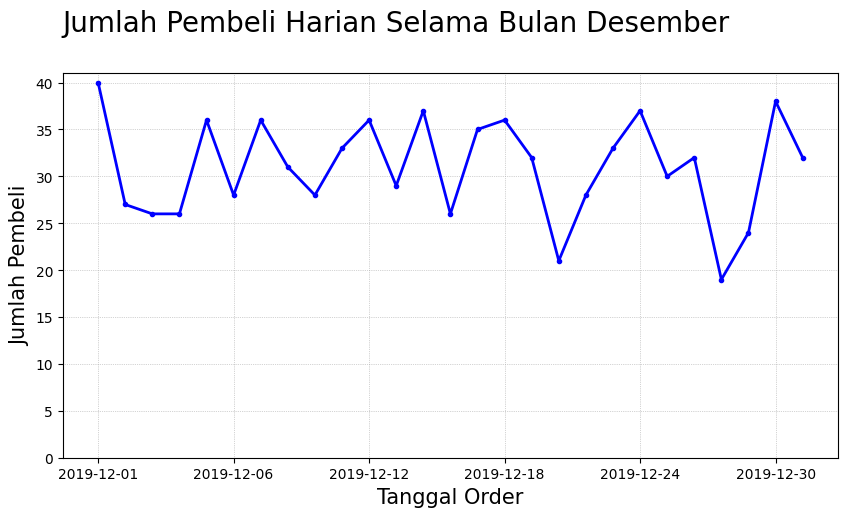

In [16]:
plt.figure(figsize=(10, 5))
dataset[dataset['order_month']=='2019-12'].groupby(['order_date'])['customer_id'].nunique().plot(color='blue', marker='.', linewidth=2)
plt.title('Jumlah Pembeli Harian Selama Bulan Desember', loc='left', pad=30, fontsize=20, color='black')
plt.xlabel('Tanggal Order', fontsize=15, color='black')
plt.ylabel('Jumlah Pembeli', fontsize=15, color='black')
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)

# Case 1

In [8]:
top_brands = (dataset[dataset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum()
                .reset_index()
                .sort_values(by='quantity',ascending=False)
                .head(5))
dataset_top5brand_dec = dataset[(dataset['order_month']=='2019-12') & (dataset['brand'].isin(top_brands['brand'].to_list()))]
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


# Case 2

<ipython-input-17-51933c2b2264>:2: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma', color=colors)


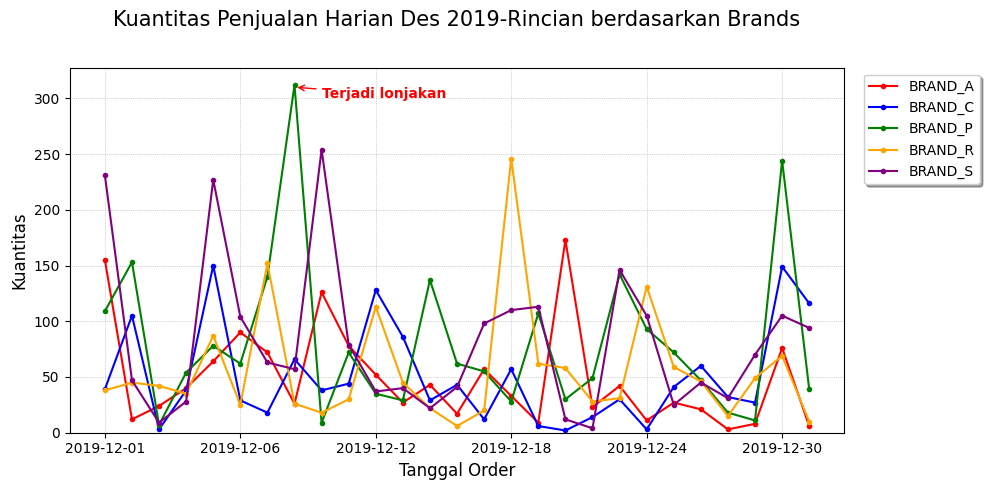

In [17]:
colors = ['red', 'blue', 'green', 'orange', 'purple']
dataset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma', color=colors)
plt.title('Kuantitas Penjualan Harian Des 2019-Rincian berdasarkan Brands',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Tanggal Order', fontsize = 12)
plt.ylabel('Kuantitas',fontsize = 12)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Terjadi lonjakan', xy=(7, 310), xytext=(8, 300),
             weight='bold', color='red',
             arrowprops=dict(arrowstyle='->',
                             connectionstyle="arc3",
                             color='red'))
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()

# Case 3

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

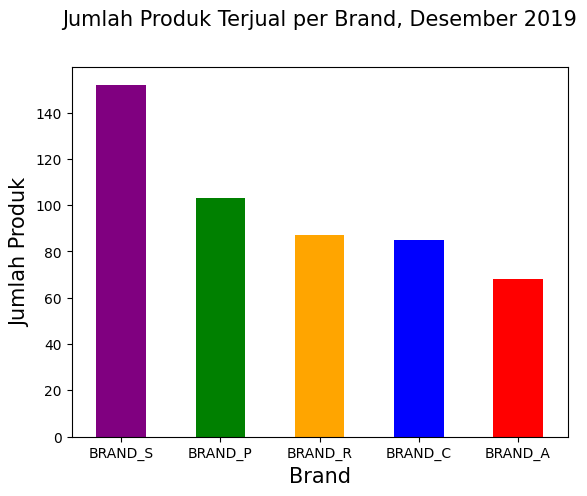

In [18]:
plt.clf()
colors = ['purple', 'green', 'orange', 'blue', 'red']
dataset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color=colors)
plt.title('Jumlah Produk Terjual per Brand, Desember 2019',loc='center',pad=30, fontsize=15, color='black')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Jumlah Produk',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

# Case 4

In [20]:
dataset_top5brand_dec_per_product = dataset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()

In [21]:
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)

In [22]:
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

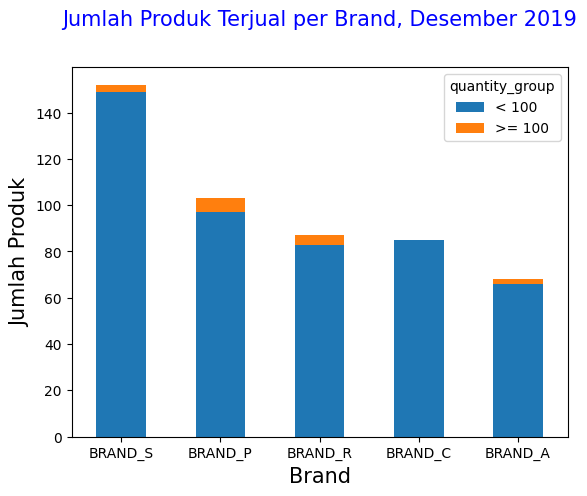

In [23]:
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Jumlah Produk Terjual per Brand, Desember 2019',loc='center',pad=30, fontsize=15, color='blue')
plt.xlabel('Brand', fontsize = 15)
plt.ylabel('Jumlah Produk',fontsize = 15)
plt.ylim(ymin=0)
plt.xticks(rotation=0)

# Case 5

(0.0, 2000000.0)

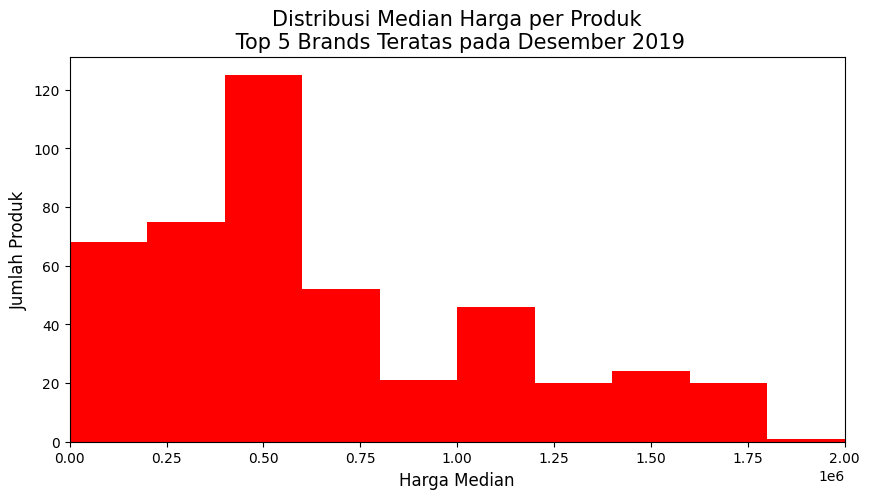

In [25]:
plt.figure(figsize=(10,5))
plt.hist(dataset_top5brand_dec.groupby('product_id')['item_price'].median(), bins=10, stacked=True, range=(1,2000000), color='red')
plt.title('Distribusi Median Harga per Produk\n Top 5 Brands Teratas pada Desember 2019',fontsize=15, color='black')
plt.xlabel('Harga Median', fontsize = 12)
plt.ylabel('Jumlah Produk',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)

# Case 6a

([<matplotlib.axis.YTick at 0x7f4df3ad41f0>,
 [Text(0, 0.0, '0'),
  Text(0, 25000000.0, '25'),
  Text(0, 50000000.0, '50'),
  Text(0, 75000000.0, '75'),
  Text(0, 100000000.0, '100'),
  Text(0, 125000000.0, '125'),
  Text(0, 150000000.0, '150'),
  Text(0, 175000000.0, '175'),
  Text(0, 200000000.0, '200')])

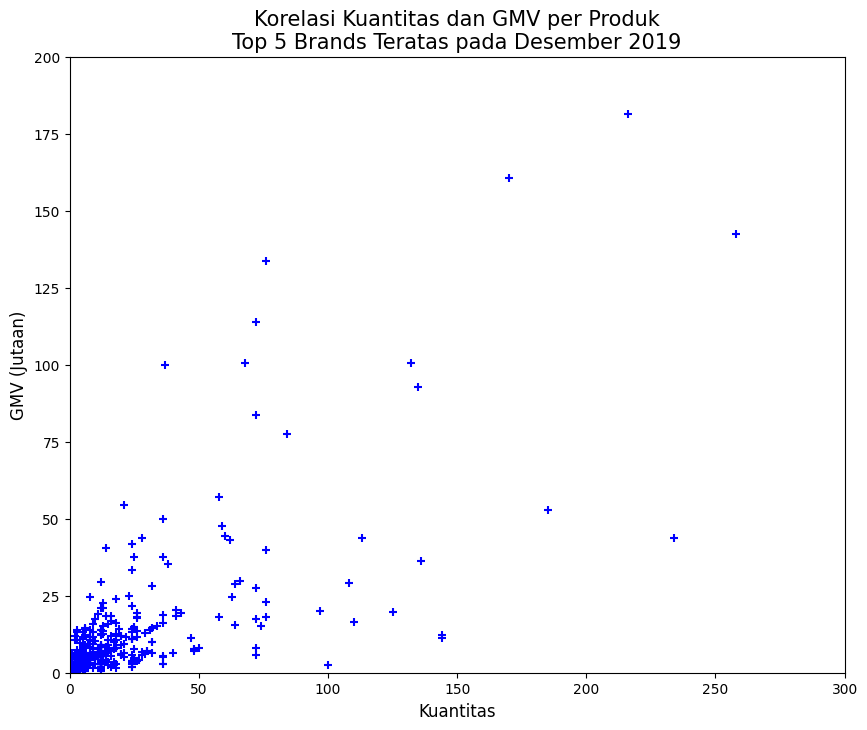

In [32]:
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['quantity'],data_per_product_top5brand_dec['gmv'], marker='+', color='blue')
plt.title('Korelasi Kuantitas dan GMV per Produk\nTop 5 Brands Teratas pada Desember 2019',fontsize=15, color='black')
plt.xlabel('Kuantitas', fontsize = 12)
plt.ylabel('GMV (Jutaan)',fontsize = 12)
plt.xlim(xmin=0,xmax=300)
plt.ylim(ymin=0,ymax=200000000)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000).astype(int))

# Case 6b

(0.0, 250.0)

<Figure size 640x480 with 0 Axes>

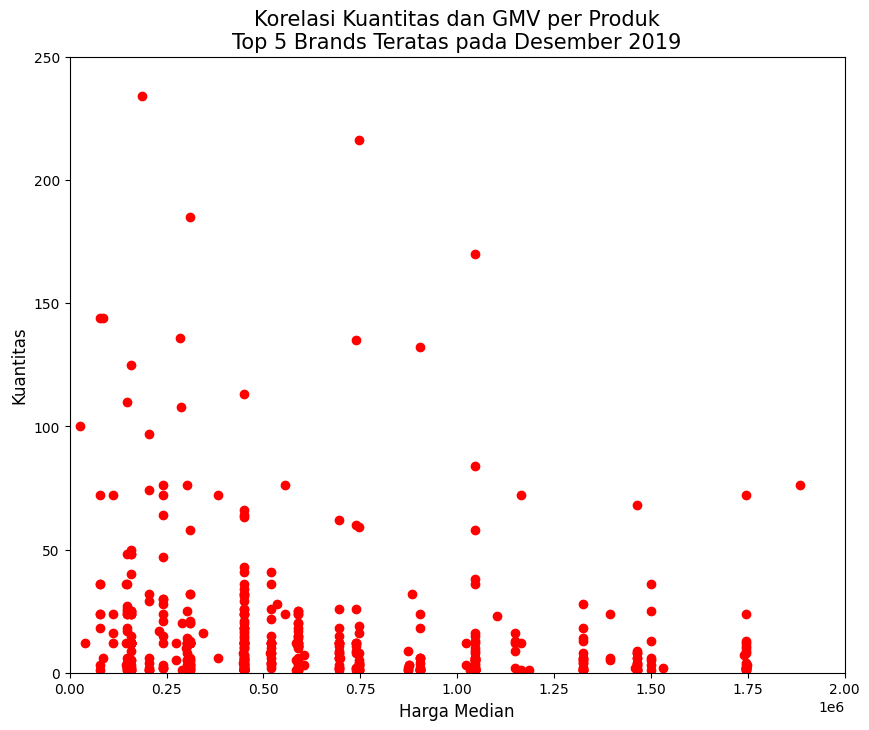

In [33]:
import matplotlib.pyplot as plt
plt.clf()
data_per_product_top5brand_dec = dataset_top5brand_dec.groupby('product_id').agg({'quantity': 'sum', 'gmv':'sum', 'item_price':'median'}).reset_index()
plt.figure(figsize=(10,8))
plt.scatter(data_per_product_top5brand_dec['item_price'],data_per_product_top5brand_dec['quantity'], marker='o', color='red')
plt.title('Korelasi Kuantitas dan GMV per Produk\nTop 5 Brands Teratas pada Desember 2019',fontsize=15, color='black')
plt.xlabel('Harga Median', fontsize = 12)
plt.ylabel('Kuantitas',fontsize = 12)
plt.xlim(xmin=0,xmax=2000000)
plt.ylim(ymin=0,ymax=250)